### Student Information
Name: 鄭勝偉

Student ID: 112065524

GitHub ID: victor890915

Kaggle name: Victor890915

Kaggle private scoreboard snapshot: final private ranking 11th

![螢幕擷取畫面 2023-12-28 011034.png](<attachment:螢幕擷取畫面 2023-12-28 011034.png>)
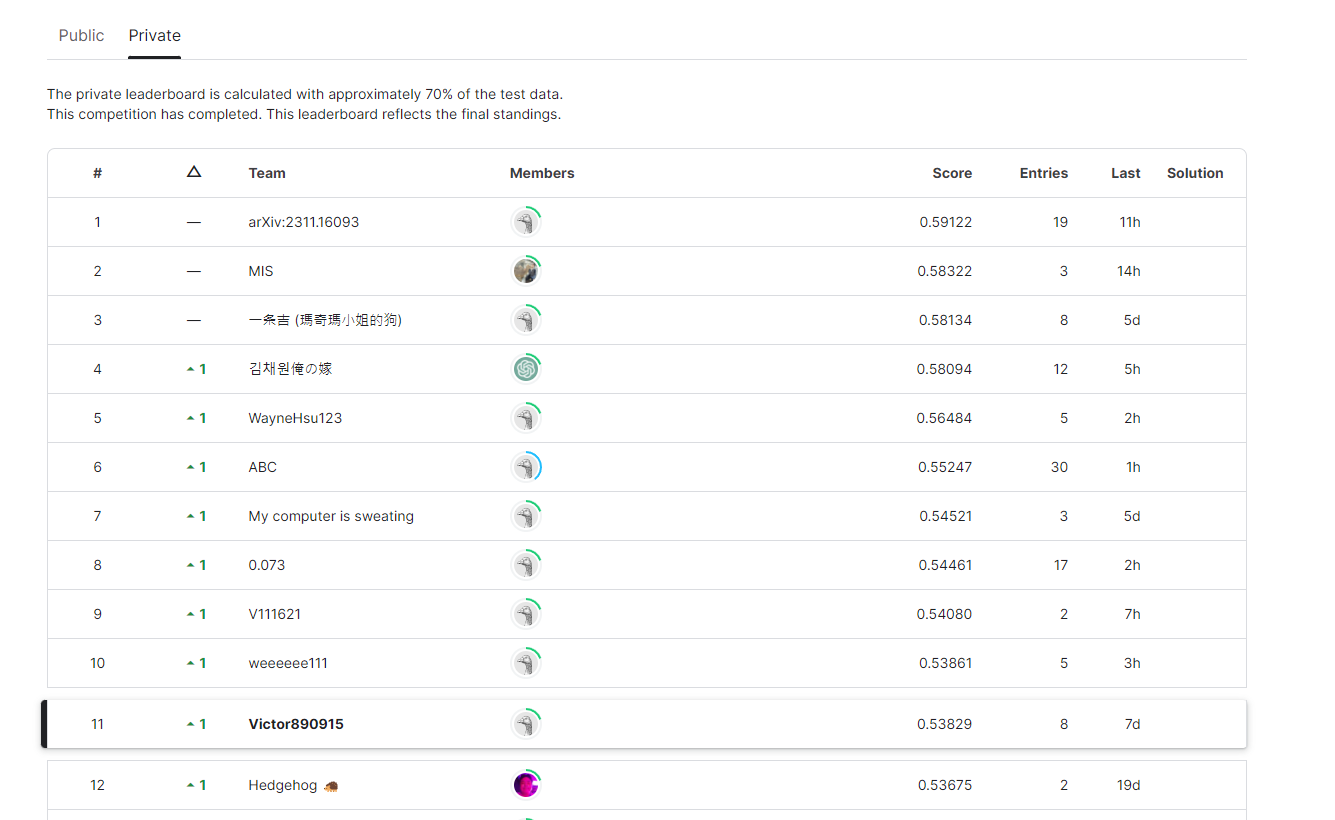

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [2]:
### Begin Assignment Here

# Part 1

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [2]:
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

os.chdir("/Users/victor890915/Desktop/school/school/DM/DMLab2/DM2023-Lab2-Master")

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df.text)
test_counts = count_vect_test.fit_transform(test_df.text)

term_frequencies_train = np.asarray(train_counts.sum(axis=0))[0]
term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]

##zip the word with it's count
freq_word_train = zip(term_frequencies_train.tolist(),count_vect_train.get_feature_names_out().tolist())
freq_word_test = zip(term_frequencies_test.tolist(),count_vect_test.get_feature_names_out().tolist())

##sort the zipped object by its word count
freq_word_train = sorted(freq_word_train, reverse= True)
freq_word_test = sorted(freq_word_test, reverse= True)


print("top 30 words in train dataset")
print(freq_word_train[:30])
print("{:^10}".format("next"))
print("top 30 words in test dataset")
print(freq_word_test[:30])

top 30 words in train dataset
[(1736, 'the'), (1289, 'to'), (955, 'and'), (796, 'you'), (793, 'of'), (787, 'is'), (717, 'it'), (626, 'in'), (537, 'that'), (535, 'my'), (446, 'for'), (390, 'on'), (383, 'be'), (380, 'me'), (350, 'this'), (328, 'so'), (312, 'have'), (303, 'not'), (301, 'just'), (293, 'but'), (288, 'with'), (269, 'at'), (257, 'can'), (243, 'like'), (243, 'all'), (231, 'are'), (229, 'your'), (228, 'was'), (226, 'when'), (216, 'if')]
   next   
top 30 words in test dataset
[(153, 'the'), (138, 'to'), (92, 'and'), (83, 'of'), (83, 'it'), (82, 'you'), (77, 'is'), (69, 'in'), (57, 'for'), (55, 'that'), (52, 'my'), (46, 'on'), (40, 'be'), (36, 'me'), (34, 'was'), (34, 'so'), (32, 'can'), (30, 'have'), (30, 'at'), (30, 'all'), (29, 'with'), (29, 'just'), (29, 'are'), (26, 'get'), (26, 'but'), (24, 'your'), (24, 'up'), (24, 'this'), (24, 'not'), (24, 'like')]


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [3]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

##create TFIDF counter
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

##fit and transform 
data_tfidf_count = tfidf_vectorizer.fit_transform(train_df["text"]).toarray()

tfidf_vectorizer.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

/Users/victor890915/anaconda3/envs/DM-2023-p310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


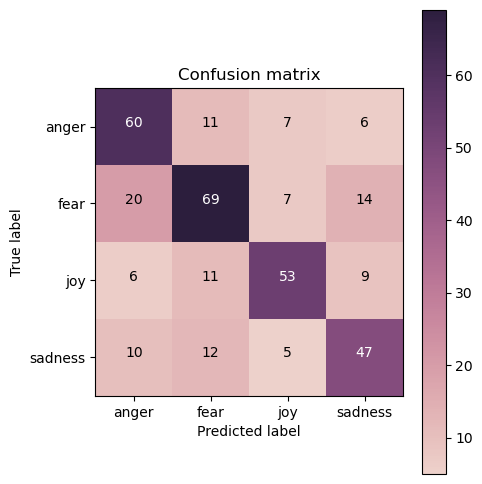

In [4]:
from sklearn.tree import DecisionTreeClassifier
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
# Funciton for visualizing confusion_matrix


def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# Answer here
'''

The diagonal line represent the datapoints that are actually predicted correctly, that is, the predicted label matches the true label,
while the other grid blocks indicate incorrectly predocted lables,
for example in column 1 row 2, 20 of the datapoints are predicted as anger while the correct label is fear 

'''

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [6]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

MNB_model = MultinomialNB()

## training!
MNB_model = MNB_model.fit(X_train, y_train)

## predict!
y_train_pred_MNB = MNB_model.predict(X_train)
y_test_pred_MNB = MNB_model.predict(X_test)

acc_train_mnb = accuracy_score(y_true=y_train, y_pred=y_train_pred_MNB)
acc_test_mnb = accuracy_score(y_true=y_test, y_pred=y_test_pred_MNB)

print('training accuracy: {}'.format(round(acc_train_mnb, 2)))
print('testing accuracy: {}'.format(round(acc_test_mnb, 2)))

cm_MNB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_MNB) 
print(cm_MNB)

training accuracy: 0.79
testing accuracy: 0.71
[[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
'''
The overall performance on naive bayes is better compared to the decision tree model (Testing accuracy 0.71 vs 0.66), 
i think that due to the nature of desicion tree and natural languages, it might be difficult for DT to determin exact splits at tree nodes,
and the sentiment meaning may not be well seperated,
on the other hand, bayes model is a probablistic model, meaning that the final output is the most probable answer, 
this way, it dont need to travel down a tree in order to find its leaf(output), and presumably making mistakes on the sentiment level on its way.
'''

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

Epoch 1/25


/Users/victor890915/anaconda3/envs/DM-2023-p310/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 4ms/step - loss: 1.3359 - accuracy: 0.3476 - val_loss: 1.2855 - val_accuracy: 0.4207
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0257 - accuracy: 0.6244 - val_loss: 0.9097 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7872 - val_loss: 0.7828 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8447 - val_loss: 0.7438 - val_accuracy: 0.7118
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.8749 - val_loss: 0.7228 - val_accuracy: 0.7061
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2766 - accuracy: 0.9087 - val_loss: 0.8277 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9233 - val_loss: 0.8472 - val_accuracy: 0.7061
Epoch 8/25
113/11

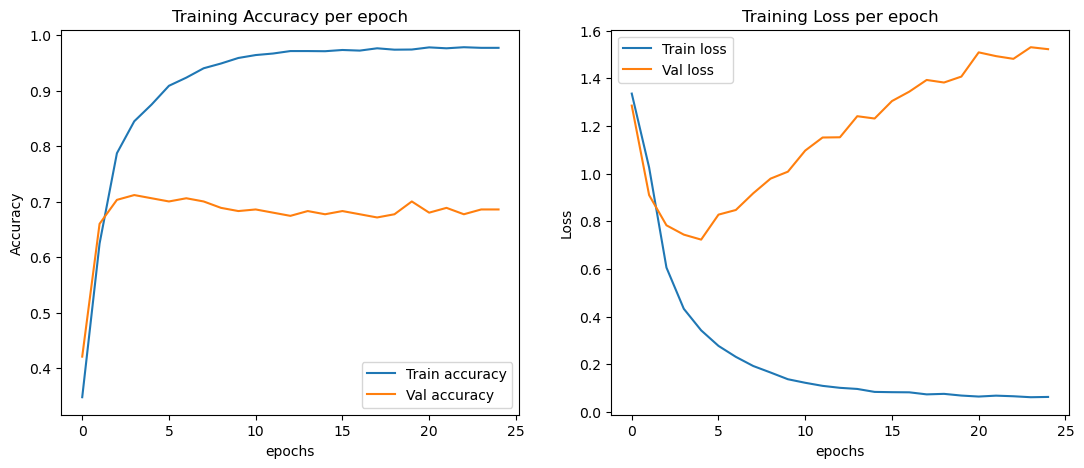

In [11]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger
os.chdir("/Users/victor890915/Desktop/school/school/DM/DMLab2/DM2023-Lab2-Master")

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")



# Answer here
fig = plt.figure(figsize=(13, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(training_log["epoch"],training_log["accuracy"],label = "Train accuracy")
ax1.plot(training_log["epoch"],training_log["val_accuracy"],label = "Val accuracy")
ax1.set_xlabel('epochs')  # Add an x-label to the axes.
ax1.set_ylabel('Accuracy')  # Add a y-label to the axes.
ax1.set_title("Training Accuracy per epoch")
ax1.legend()

ax2.plot(training_log["epoch"],training_log["loss"],label = "Train loss")
ax2.plot(training_log["epoch"],training_log["val_loss"],label = "Val loss")
ax2.set_xlabel('epochs')  # Add an x-label to the axes.
ax2.set_ylabel('Loss')  # Add a y-label to the axes.
ax2.set_title("Training Loss per epoch")
ax2.legend()




In [ ]:
'''
form the graph for accuracy and loss, we can see that the accuracy for the validation set peaked at around epoch 3 or 4,
which is relatively early in the 25 total epochs, as for the loss for the validation set, it stopped dropping after epoch 4, 
implying that there might be some overfitting issues after epoch 4 and we can probably implement some early stopping methods to 
alleviate this issue. 
'''

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [12]:
import gensim
from gensim.models import Word2Vec


## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [13]:
# Answer here
'''
an way of representing a sentence using word2vec is to take the average of all word vectors in a sentence, example below 
'''


def get_sentence_vector(tokens):
    sentence_vector = np.zeros(100)
    for token in tokens:
        sentence_vector += word2vec_model.wv[token]

    return (sentence_vector / len(tokens))

example_sectence_vector = get_sentence_vector(train_df["text_tokenized"][0])
example_sectence_vector


array([-0.21866196,  0.18511758, -0.0728942 ,  0.49445792, -0.2266638 ,
       -0.79863167,  0.30461552,  1.18696766, -0.62583152, -0.5850657 ,
        0.05369006, -0.70333902, -0.37438129,  0.34794264, -0.23467942,
       -0.07625606,  0.42543643, -0.52315462, -0.20907899, -1.36416836,
        0.47958661,  0.24532854,  0.54753614, -0.17552087, -0.07181643,
        0.14663636, -0.5761995 ,  0.31802741, -0.19337503, -0.09634872,
        0.57083588, -0.06629746,  0.33816281, -0.48896223, -0.47923689,
        0.63524251,  0.57714564, -0.43670454, -0.42284368, -0.52125095,
        0.18424341,  0.15931404, -0.59503453, -0.23324985,  0.29230823,
       -0.12627369, -0.44233659,  0.4057061 ,  0.30491254,  0.37752593,
        0.18727137,  0.07435765, -0.16212797,  0.14684845,  0.2416967 ,
       -0.08732726,  0.3060147 , -0.62828504, -0.11293797,  0.12644147,
        0.02452069,  0.14370808,  0.38315662, -0.04502092, -0.72626122,
        0.31236788, -0.17146084,  0.4009854 , -0.72936041,  0.30

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

load ok


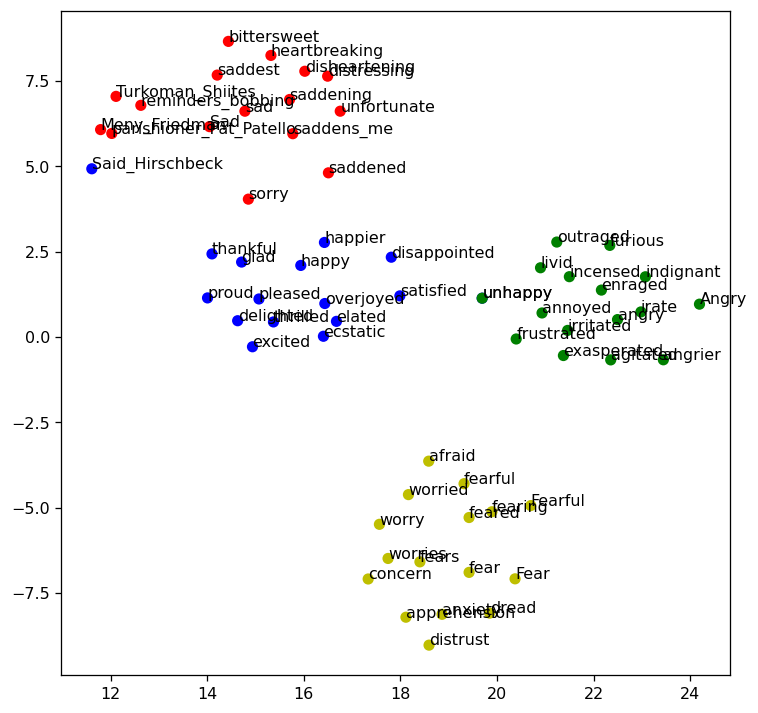

In [17]:
from gensim.models import KeyedVectors
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)



# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words_ex8 = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words_ex8)
all_word = list(model.index_to_key)
word_train_ex8 = target_words_ex8 + all_word[:size]
X_train_ex8 = model[word_train_ex8]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne_ex8 = tsne.fit_transform(X_train_ex8)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne_ex8[:target_size, 0], X_tsne_ex8[:target_size, 1], c=color)
for label, x, y in zip(target_words_ex8, X_tsne_ex8[:target_size, 0], X_tsne_ex8[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# Part 2 and 3


In [1]:
import pandas as pd
import os
os.chdir("/Users/victor890915/Desktop/school/school/DM/DMLab2/DM2023-Lab2-Master")

##read original file
df = pd.read_json("kaggle_data/tweets_DM.json",lines = True)
df.head()



,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


In [3]:
##original json file is kinda messy , all the useful info are jammed in __source
##below are some custom functions to extract the information into a clean dataframe

def get_id(source):
    tweet = source["tweet"]
    return tweet.get('tweet_id')

def get_hashtag(source):
    tweet = source["tweet"]
    return tweet.get('hashtags')

def get_text(source):
    tweet = source["tweet"]
    return tweet.get('text')

In [4]:
data = pd.DataFrame()
data["tweet_id"] = df["_source"].apply(lambda x: get_id(x))
data["hashtags"] = df["_source"].apply(lambda x: get_hashtag(x))
data["text"] = df["_source"].apply(lambda x: get_text(x))



In [5]:
data_identification = pd.read_csv("kaggle_data/data_identification.csv")
data_emotion = pd.read_csv("kaggle_data/emotion.csv")

print(len(data_identification))
print(len(data_emotion))

1867535
1455563


In [6]:
data_emotion["emotion"].unique()

array(['sadness', 'disgust', 'anticipation', 'joy', 'trust', 'anger',
       'fear', 'surprise'], dtype=object)

In [7]:
##extraction training entries and store it in "train_data"
train_data_ids = data_identification[data_identification["identification"]=="train"]
train_data = pd.merge(train_data_ids, data_emotion, on="tweet_id", how='outer')
train_data = pd.merge(train_data,data, on="tweet_id", how='left')

train_data = train_data[["tweet_id","hashtags","text","emotion"]]

In [8]:
##extraction testioning entries and store it in "test_data"
test_data_ids = data_identification[data_identification["identification"]=="test"]
test_data = pd.merge(test_data_ids, data, on="tweet_id", how='left')
test_data = test_data[["tweet_id","hashtags","text"]]

#length is correct
print(len(test_data))

411972


In [9]:
import re

## use regular expression to remove any @mentions, in the original text,
## reason is because that @mentions usually tags another account and the name of the account 
## is likely to have no impact on the emotion of the sentence, so i remove them.
def remove_mention(text):
    return re.sub("@[\w]+",'',text)

In [10]:

## remove @mention on all text data
train_data["text"] = train_data["text"].apply(lambda x: remove_mention(x))

#### first approach use count vectorizer and desition tree classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk



# build analyzers (bag-of-words)
bow_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize,stop_words='english') 

# apply analyzer to training data
bow_500.fit(train_data['text'])


In [15]:

train_data_bow_features_500 = bow_500.transform(train_data['text'])

print(train_data_bow_features_500.shape)



(1455563, 500)


In [16]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = train_data_bow_features_500
y_train = train_data['emotion']

X_test = bow_500.transform(test_data['text'])


In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)

## training!
dt_model = dt_model.fit(X_train, y_train)


In [18]:
from sklearn.metrics import accuracy_score

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print(accuracy_score(y_train_pred,train_data["emotion"]))


0.8600094946079283


In [26]:
print(type(y_test_pred))
print(y_test_pred)

<class 'numpy.ndarray'>
['joy' 'joy' 'sadness' ... 'surprise' 'sadness' 'fear']


In [ ]:

## saving the predoction results and export it into a csv file 
answer_df = pd.DataFrame()
answer_df["id"] = test_data_ids["tweet_id"]
answer_df.reset_index(drop=True, inplace=True)



In [34]:
answer_df["emotion"] = y_test_pred
answer_df

,id,emotion
0,0x28cc61,joy
1,0x2db41f,joy
2,0x2466f6,sadness
3,0x23f9e9,sadness
4,0x1fb4e1,sadness
...,...,...
411967,0x2c4dc2,anticipation
411968,0x31be7c,anticipation
411969,0x1ca58e,surprise
411970,0x35c8ba,sadness


In [36]:
answer_df.to_csv("submission.csv",index= False)

## result
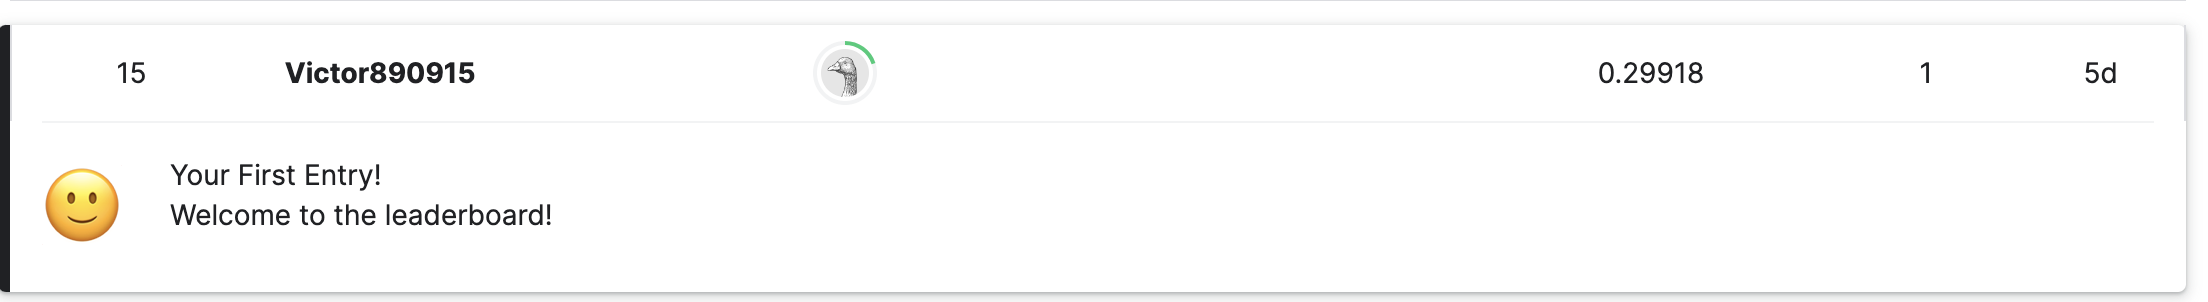


# Finetune DistilBERT as a text classifier

the following was executed on another computer(sever), 
since there's no way to copy a cell and its output all at once and paste it here, 
therefore there will be some unexecuted cells (just code), but I will do my best to explain them

the preprocessing steps are the same as before, i only removed the @mention in every text input

In [22]:
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [51]:
## function for tokenizing input sentences using tokenizer defined by distilbert
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [45]:
emo_dict = {'sadness': 0, 'disgust': 1,  'anticipation': 2, 'joy': 3, 'trust': 4, 'anger': 5, 'fear': 6, 'surprise': 7}

##function to map each emotion to a label (basically a label encoder)
def map_emotion(emotion):
    return emo_dict.get(emotion)

#'sadness', 'disgust', 'anticipation', 'joy', 'trust', 'anger','fear', 'surprise'], dtype=object)


In [50]:
## preparing data for bert as well as doing the label encoding
bert_train_data = train_data[["text","emotion"]]
bert_train_data["label"] = bert_train_data["emotion"].apply(lambda x: map_emotion(x))
bert_train_data = bert_train_data[["text","label"]] 
bert_train_data[:10]

/var/folders/hd/kcs86wyx293cm01dd86rq0d40000gn/T/ipykernel_33158/3459176628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_train_data["label"] = bert_train_data["emotion"].apply(lambda x: map_emotion(x))


,text,label
0,Huge Respect🖒 talking about losing his dad to...,3
1,Yoooo we hit all our monthly goals with the ne...,3
2,Well done team 🌟 <LH> of every one of you.,4
3,Come join on #PUBG while he strives for chick...,3
4,Blessings!My #strength little. My #bones brit...,2
5,Never give up. The manifestation of your goal ...,2
6,I Believe When No One Else Does... <LH> #Dream...,2
7,with due respect... Do u have any sympathies ...,3
8,I can't tell if I'm alive or in the after life...,0
9,#GRATEFUL!! WORLD GOODMORNING!,4


In [ ]:
## I split the data into 120000 training set and rest to be testing set
## then i put them into Dataset datasturcture in order the use the Hugging face API
train_dataset = Dataset.from_pandas(bert_train_data[:1200000])
test_dataset = Dataset.from_pandas(bert_train_data[1200000:])

In [ ]:
## feed the training and testing data into the tokenizer 
tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
tokenized_test_dataset = test_dataset.map(preprocess_function, batched=True)

In [ ]:
from transformers import DataCollatorWithPadding

## declare a data collator for the trainer to use 
## a dataCollator is to handle tasks such as padding, truncation, 
## and other data processing steps that are specific to the requirements of transformer-based models.
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

## also a function for the trainer to use, 
## this is called to calculate the accuracy for every epoch

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:

## two dictionaries are requied by the trainer to map the ansewers between id and label
id2label = {0: 'sadness', 1: 'disgust', 2: 'anticipation', 3: 'joy', 4: 'trust', 5: 'anger', 6: 'fear', 7: 'surprise'}

label2id = {'sadness': 0, 'disgust': 1,  'anticipation': 2, 'joy': 3, 'trust': 4, 'anger': 5, 'fear': 6, 'surprise': 7}


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

## loading the pretrained distilbert model

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=8, id2label=id2label, label2id=label2id)
device = torch.device('cuda')
model.to(device)

In [ ]:
training_args = TrainingArguments(
    output_dir="distilbert_model",
    learning_rate=2e-5,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    num_train_epochs=20,                 ## train for 20 epochs , export model at each epoch
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

## HuggingFace's trainer API,just give the required objects and the rest is automatic.
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

training for 20 epoch took around 6 hours on 4 RTX 2080Ti

In [ ]:
## remove @mentions on testing dataset(this is different from bert's testing set, this test_data is the final data to upload to kaggle 
## and DONT have the ground truth labels)
test_data["text"] = test_data["text"].apply(lambda x: remove_mention(x))

In [ ]:
from transformers import pipeline

## HuggingFaces classifier API, basically a easy to use inferencing pipeline 
classifier = pipeline("sentiment-analysis", model="distilbert_model/checkpoint-28128", device = 0)

In [ ]:
## a function to use the classifier
def classify_emotion(text):
    return classifier(text)[0].get("label")

In [ ]:
from tqdm import tqdm

##inferencing the test_data set and saving them into a csv file

answer_list = []
for i in tqdm(range(len(test_data))):
    answer_list.append(classify_emotion(test_data['text'][i]))

test_data['emotion'] = answer_list

answer_df = test_data[["tweet_id", 'emotion']]
answer_df.reset_index(drop=True, inplace=True)


answer_df.rename(columns={"tweet_id": "id","emotion": "emotion"},inplace = True)
answer_df.to_csv("submission_bistilbert_10epoch.csv",index= False)

## results

I've tried four models (2, 5, 10, 20) epochs and the following are the results, the 5 epoch model performed the best with a score of 0.53352

![截圖 2023-12-12 晚上8.41.17.png](<attachment:截圖 2023-12-12 晚上8.41.17.png>)
(figure above is 2 epoch)

![截圖 2023-12-12 晚上8.41.49.png](<attachment:截圖 2023-12-12 晚上8.41.49.png>)

![截圖 2023-12-12 晚上8.41.57.png](<attachment:截圖 2023-12-12 晚上8.41.57.png>)

![截圖 2023-12-12 晚上8.42.04.png](<attachment:截圖 2023-12-12 晚上8.42.04.png>)

also attempted training gpt2 on 2 3 5 epochs
which is the <strong>best overall result with a score of 0.5534(5epoch)</strong>

![截圖 2023-12-14 下午5.57.56.png](<attachment:截圖 2023-12-14 下午5.57.56.png>)

![截圖 2023-12-26 上午10.30.47.png](<attachment:截圖 2023-12-26 上午10.30.47.png>)
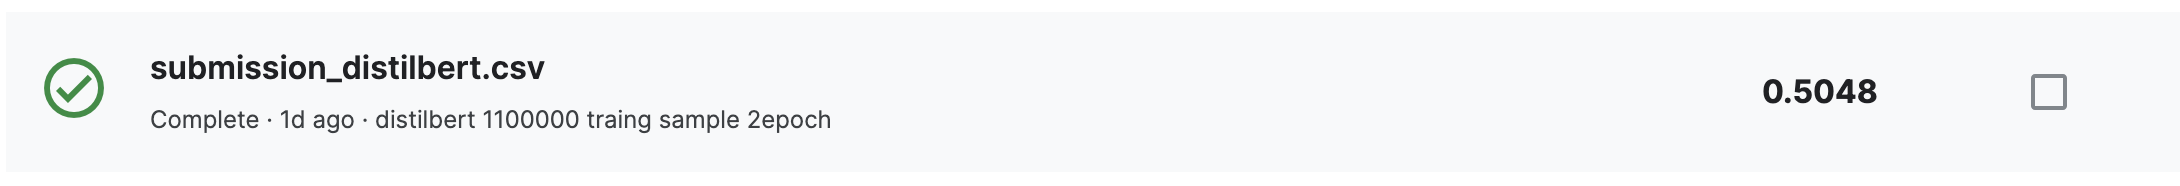
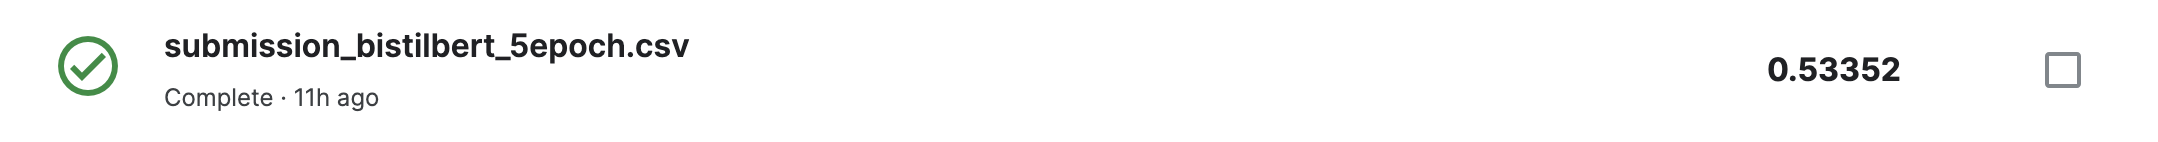
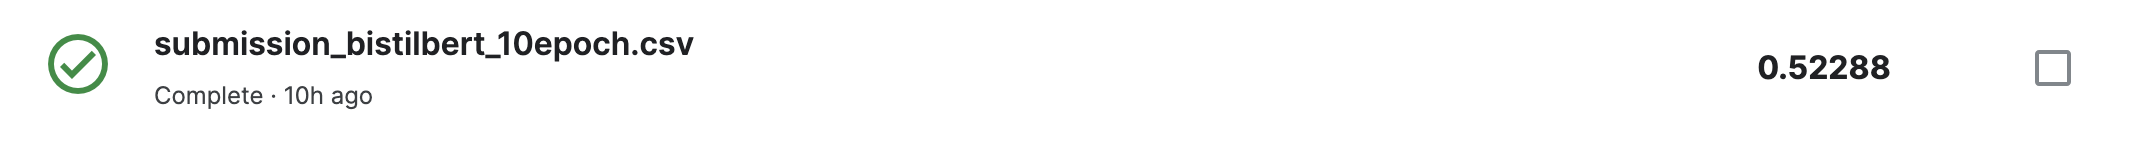
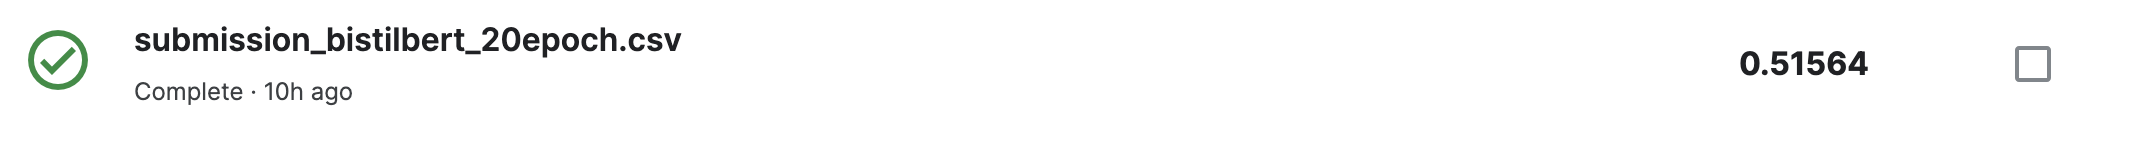
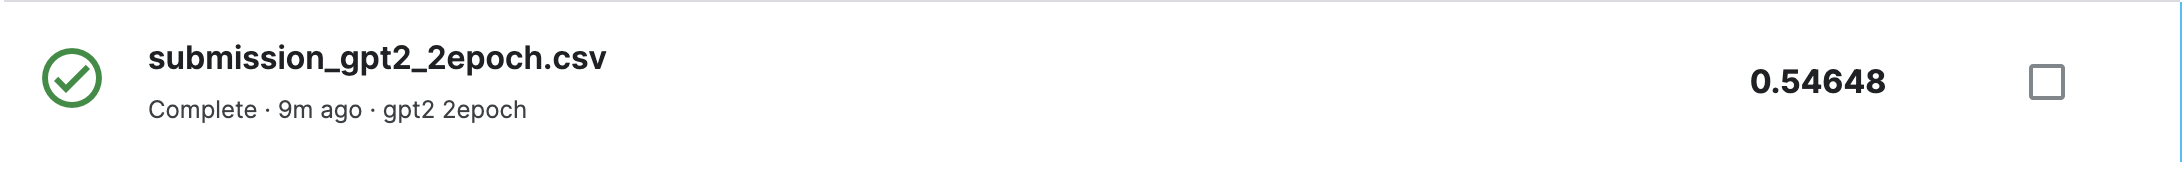
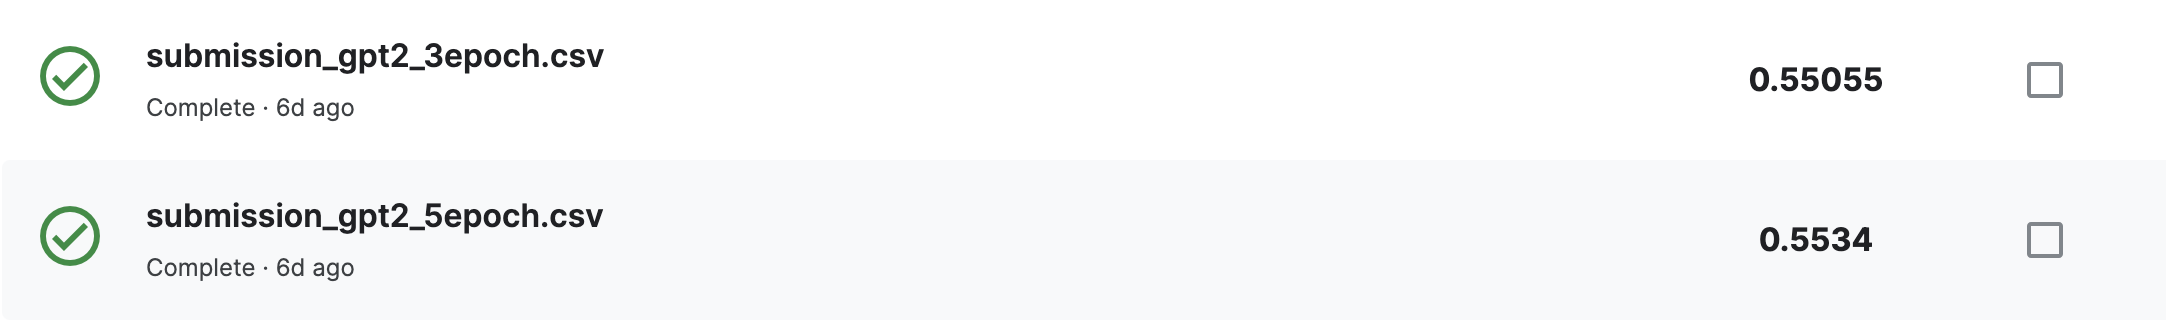